In [1]:
# import the main libraries
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from shapely.geometry import Polygon, MultiPolygon


def groupby_multipoly(df, by, aggfunc="first"):
    data = df.drop(labels=df.geometry.name, axis=1)
    aggregated_data = data.groupby(by=by).agg(aggfunc)

    # Process spatial component
    def merge_geometries(block):
        return MultiPolygon(block.values)

    g = df.groupby(by=by, group_keys=False)[df.geometry.name].agg(
        merge_geometries
    )

    # Aggregate
    aggregated_geometry = gpd.GeoDataFrame(g, geometry=df.geometry.name, crs=df.crs)
    # Recombine
    aggregated = aggregated_geometry.join(aggregated_data)
    return aggregated

In [19]:
original = gpd.read_file("Sea_Ice_Extents_original.geojson")

In [20]:
original.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

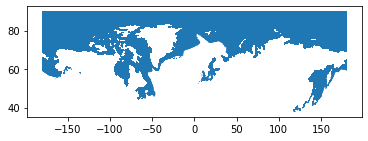

In [21]:
original.plot()

In [4]:
old = gpd.read_file("Data/NSIDC_SeaIceExtent/Sea_Ice_Extents.geojson")

In [5]:
old

,objectid,name,analysisdate,month,year,SHAPE_Length,SHAPE_Area,geometry
0,1,197811,1978-11-01T00:00:00,11,1978,2665.940717,5860.240913,"MULTIPOLYGON (((143.393 49.073, 143.216 48.270..."
1,2,197812,1978-12-01T00:00:00,12,1978,3033.019146,6265.555672,"MULTIPOLYGON (((141.613 44.384, 141.551 43.992..."
2,3,197901,1979-01-01T00:00:00,1,1979,3178.760589,6509.636565,"MULTIPOLYGON (((119.055 38.246, 119.120 38.065..."
3,4,197902,1979-02-01T00:00:00,2,1979,3235.443751,6636.114144,"MULTIPOLYGON (((121.608 38.771, 121.663 38.587..."
4,5,197903,1979-03-01T00:00:00,3,1979,3234.851666,6644.073562,"MULTIPOLYGON (((118.301 38.268, 118.369 38.088..."
...,...,...,...,...,...,...,...,...
434,435,201503,2015-03-01T00:00:00,3,2015,3095.138796,6216.510274,"MULTIPOLYGON (((125.259 38.969, 125.300 38.783..."
435,436,201504,2015-04-01T00:00:00,4,2015,3028.573689,6130.483827,"MULTIPOLYGON (((125.259 38.969, 125.300 38.783..."
436,437,201505,2015-05-01T00:00:00,5,2015,2812.741868,5920.578131,"MULTIPOLYGON (((144.372 44.305, 144.328 44.110..."
437,438,201506,2015-06-01T00:00:00,6,2015,2734.209098,5529.887519,"MULTIPOLYGON (((143.545 47.014, 143.502 46.816..."


<AxesSubplot:>

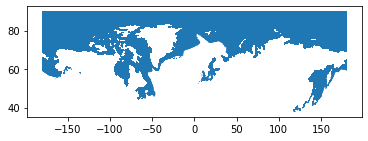

In [6]:
old.plot()


In [7]:
old.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

39
4 Coverage and Resolution
4.1 Temporal Coverage and Resolution
The Sea Ice Index time series begins in November 1978 and extends through the present. Over this long record, different
instruments have been used to capture the data. Table 1, in the Instrument Description section, lists the instruments
used by the Sea Ice Index's source data products and gives the temporal coverage of the them. The temporal coverage
of the source data products (as of January 2017) is:
• GSFC Product data: 26 October 1978 through 31 December 2020. There are no data from 3 December 1987 to
13 January 1988 due to satellite problems.
• NRTSI Product data: 01 January 2021 to present.
The temporal resolution of the Sea Ice Index is daily and monthly. Only the monthly data and images are archived. Daily
data (extent values) are archived as well. Daily ice extent image files are available for the previous day only and are not
archived. Daily ice concentration browse images from the GSFC product and NRTSI product are archived, however. See
the NRTSI product site and the GSFC product site and click on the browse directory.
Note: For the SSMR portion of the record, a given polar region was, depending on latitude, only sensed every other day
or less. For the SSM/I and later portions of the record, a given polar region was sensed every day.
4.2 Spatial Coverage and Resolution
4.2.1 Coverage, Projection, and Grid Cell Size
Sea Ice Index images and data are based on gridded concentrations that come from a product with a spatial coverage
that is north of 30.98° N for the Northern Hemisphere and south of 39.23° S for the Southern Hemisphere. Sea Ice Index
images and alphanumeric data are based on gridded concentration data in the NSIDC Polar Stereographic Projection
using the Hughes ellipsoid datum and EPSG 3411, for the Arctic, and EPSG 3412, for the Antarctic. For more information,
see NSIDC’s Polar Stereographic Projections and Grids web page.

In [9]:
new1 = gpd.read_file("Data/NSIDC_SeaIceExtent/unzipped/extent_N_201601_polygon_v3.0.shp")
new1

,FID,geometry
0,0,"POLYGON ((1000000.000 5850000.000, 1050000.000..."
1,1,"POLYGON ((1650000.000 5800000.000, 1675000.000..."
2,2,"POLYGON ((700000.000 5775000.000, 750000.000 5..."
3,3,"POLYGON ((1325000.000 5775000.000, 1350000.000..."
4,4,"POLYGON ((1050000.000 5750000.000, 1075000.000..."
...,...,...
129,129,"POLYGON ((-1425000.000 -4750000.000, -1400000...."
130,130,"POLYGON ((-1325000.000 -4775000.000, -1300000...."
131,131,"POLYGON ((-1700000.000 -4800000.000, -1650000...."
132,132,"POLYGON ((-1425000.000 -4850000.000, -1400000...."


In [10]:
new1.crs

<Projected CRS: EPSG:3411>
Name: NSIDC Sea Ice Polar Stereographic North
Axis Info [cartesian]:
- X[south]: Easting (metre)
- Y[south]: Northing (metre)
Area of Use:
- name: Northern hemisphere - north of 60°N onshore and offshore, including Arctic.
- bounds: (-180.0, 60.0, 180.0, 90.0)
Coordinate Operation:
- name: US NSIDC Sea Ice polar stereographic north
- method: Polar Stereographic (variant B)
Datum: Not specified (based on Hughes 1980 ellipsoid)
- Ellipsoid: Hughes 1980
- Prime Meridian: Greenwich

In [13]:
new1.crs = "+proj=stere +lat_0=90 +lat_ts=70 +lon_0=-45 +k=1 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs"

https://geopandas.org/en/stable/docs/user_guide/projections.html

In [14]:
new1.crs

<Projected CRS: +proj=stere +lat_0=90 +lat_ts=70 +lon_0=-45 +k=1 + ...>
Name: unknown
Axis Info [cartesian]:
- E[south]: Easting (metre)
- N[south]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Polar Stereographic (variant B)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

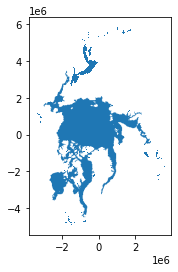

In [15]:
new1.plot()

In [16]:
test2 = new1.set_crs(3413, allow_override=True)

<AxesSubplot:>

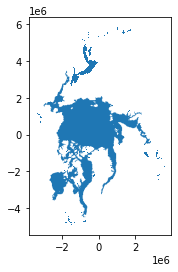

In [17]:
test2.plot()

In [18]:
test2.crs

<Projected CRS: EPSG:3413>
Name: WGS 84 / NSIDC Sea Ice Polar Stereographic North
Axis Info [cartesian]:
- X[south]: Easting (metre)
- Y[south]: Northing (metre)
Area of Use:
- name: Northern hemisphere - north of 60°N onshore and offshore, including Arctic.
- bounds: (-180.0, 60.0, 180.0, 90.0)
Coordinate Operation:
- name: US NSIDC Sea Ice polar stereographic north
- method: Polar Stereographic (variant B)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

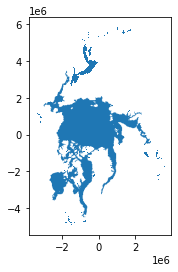

In [16]:
new_crs = new1.to_crs(3413)

new_crs.plot()

In [17]:
new_crs.crs

<Projected CRS: EPSG:3413>
Name: WGS 84 / NSIDC Sea Ice Polar Stereographic North
Axis Info [cartesian]:
- X[south]: Easting (metre)
- Y[south]: Northing (metre)
Area of Use:
- name: Northern hemisphere - north of 60°N onshore and offshore, including Arctic.
- bounds: (-180.0, 60.0, 180.0, 90.0)
Coordinate Operation:
- name: US NSIDC Sea Ice polar stereographic north
- method: Polar Stereographic (variant B)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

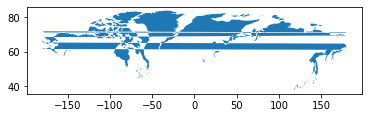

In [20]:
test2.to_crs(epsg=4326, inplace=True)

test2.plot()

In [ ]:
--------------------------

In [24]:
test2

,FID,geometry
0,0,"POLYGON ((125.29961 38.78287, 124.82449 38.717..."
1,1,"POLYGON ((119.11986 38.06502, 118.89165 38.013..."
2,2,"POLYGON ((128.08877 39.67461, 127.60041 39.627..."
3,3,"POLYGON ((122.07786 38.85696, 121.84246 38.814..."
4,4,"POLYGON ((124.65132 39.46310, 124.41043 39.428..."
...,...,...
129,129,"POLYGON ((-61.69924 46.37323, -61.42219 46.430..."
130,130,"POLYGON ((-60.50864 46.40298, -60.22973 46.455..."
131,131,"POLYGON ((-64.50245 45.31344, -63.97041 45.444..."
132,132,"POLYGON ((-61.37355 45.60860, -61.10130 45.664..."


In [23]:
test2["geometry" == 180]

KeyError: False

In [12]:
new1.to_file("new1_3411.geojson", driver='GeoJSON')

In [13]:
new2 = gpd.read_file("new1_3411.geojson")

<AxesSubplot:>

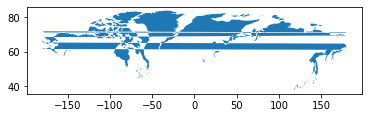

In [14]:
new2.to_crs(epsg=4326, inplace=True)

new2.plot()

In [31]:
new1["SHAPE_Area"] = new1["geometry"].area/ 10**6

new1.head()

,FID,geometry,SHAPE_Area
0,0,"POLYGON ((1000000.000 5850000.000, 1050000.000...",5625.0
1,1,"POLYGON ((1650000.000 5800000.000, 1675000.000...",625.0
2,2,"POLYGON ((700000.000 5775000.000, 750000.000 5...",1875.0
3,3,"POLYGON ((1325000.000 5775000.000, 1350000.000...",625.0
4,4,"POLYGON ((1050000.000 5750000.000, 1075000.000...",1250.0


In [32]:
new1["dummy"] = 1
new1

,FID,geometry,SHAPE_Area,dummy
0,0,"POLYGON ((1000000.000 5850000.000, 1050000.000...",5625.0,1
1,1,"POLYGON ((1650000.000 5800000.000, 1675000.000...",625.0,1
2,2,"POLYGON ((700000.000 5775000.000, 750000.000 5...",1875.0,1
3,3,"POLYGON ((1325000.000 5775000.000, 1350000.000...",625.0,1
4,4,"POLYGON ((1050000.000 5750000.000, 1075000.000...",1250.0,1
...,...,...,...,...
129,129,"POLYGON ((-1425000.000 -4750000.000, -1400000....",625.0,1
130,130,"POLYGON ((-1325000.000 -4775000.000, -1300000....",625.0,1
131,131,"POLYGON ((-1700000.000 -4800000.000, -1650000....",1250.0,1
132,132,"POLYGON ((-1425000.000 -4850000.000, -1400000....",625.0,1


In [34]:
new1 = groupby_multipoly(new1, by="dummy")

In [14]:
s = 'extent_N_201601_polygon_v3.0.shp'

In [44]:
#path = r'/content/drive/MyDrive/group_project/data'

path = 'Data/NSIDC_SeaIceExtent/unzipped'

#os.chdir(path)

for filename in os.listdir(path):
    f = os.path.join(path, filename)
    if os.path.splitext(f)[-1] == ".shp": # check if it's a .nc file
        df = gpd.read_file(f)
        s = filename
        year = s[9:13] # store the year info from the filename
        month = s[13:15] #store the month info from the filename        
        print(s)        
        df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area
        df["dummy"] = 1                                 # create a dummy column to group by on
        df = groupby_multipoly(df, by="dummy")          # convert polygons to multipolygons
        df["month"] = month                             # add the month info as a new column
        df["year"] = year                               # add the year info as a new column
        df['month']= df.month.astype(int)               # change data type to integer
        df['year'] = df.year.astype(int)                # change data type to integer
        df.to_crs(epsg=4326, inplace=True)  #change crs to join to the 'old' geojson
        old = pd.concat([old, df ], ignore_index=True, sort=False)
        
          

extent_N_201601_polygon_v3.0.shp
extent_N_201602_polygon_v3.0.shp


/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area
/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area


extent_N_201603_polygon_v3.0.shp
extent_N_201604_polygon_v3.0.shp


/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area
/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area


extent_N_201605_polygon_v3.0.shp
extent_N_201606_polygon_v3.0.shp


/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area
/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area


extent_N_201607_polygon_v3.0.shp
extent_N_201609_polygon_v3.0.shp


/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area
/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area


extent_N_201610_polygon_v3.0.shp
extent_N_201611_polygon_v3.0.shp


/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area
/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area


extent_N_201612_polygon_v3.0.shp
extent_N_201701_polygon_v3.0.shp


/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area
/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area


extent_N_201702_polygon_v3.0.shp
extent_N_201703_polygon_v3.0.shp


/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area
/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area


extent_N_201704_polygon_v3.0.shp
extent_N_201705_polygon_v3.0.shp


/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area
/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area


extent_N_201706_polygon_v3.0.shp
extent_N_201707_polygon_v3.0.shp


/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area
/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area


extent_N_201708_polygon_v3.0.shp
extent_N_201709_polygon_v3.0.shp


/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area
/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area


extent_N_201710_polygon_v3.0.shp
extent_N_201711_polygon_v3.0.shp


/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area
/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area


extent_N_201712_polygon_v3.0.shp
extent_N_201801_polygon_v3.0.shp


/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area
/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area


extent_N_201802_polygon_v3.0.shp
extent_N_201803_polygon_v3.0.shp


/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area
/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area


extent_N_201804_polygon_v3.0.shp
extent_N_201805_polygon_v3.0.shp


/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area
/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area


extent_N_201806_polygon_v3.0.shp
extent_N_201807_polygon_v3.0.shp


/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area
/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area


extent_N_201808_polygon_v3.0.shp
extent_N_201809_polygon_v3.0.shp


/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area
/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area


extent_N_201810_polygon_v3.0.shp
extent_N_201811_polygon_v3.0.shp


/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area
/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area


extent_N_201812_polygon_v3.0.shp
extent_N_201901_polygon_v3.0.shp


/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area
/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area


extent_N_201902_polygon_v3.0.shp
extent_N_201903_polygon_v3.0.shp


/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area
/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area


extent_N_201904_polygon_v3.0.shp
extent_N_201905_polygon_v3.0.shp


/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area
/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area


extent_N_201906_polygon_v3.0.shp
extent_N_201907_polygon_v3.0.shp


/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area
/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area


extent_N_201908_polygon_v3.0.shp
extent_N_201909_polygon_v3.0.shp


/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area
/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area


extent_N_201910_polygon_v3.0.shp
extent_N_201911_polygon_v3.0.shp


/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area
/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area


extent_N_201912_polygon_v3.0.shp
extent_N_202001_polygon_v3.0.shp


/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area
/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area


extent_N_202002_polygon_v3.0.shp
extent_N_202003_polygon_v3.0.shp


/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area
/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area


extent_N_202004_polygon_v3.0.shp
extent_N_202005_polygon_v3.0.shp


/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area
/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area


extent_N_202006_polygon_v3.0.shp
extent_N_202007_polygon_v3.0.shp


/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area
/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area


extent_N_202008_polygon_v3.0.shp
extent_N_202009_polygon_v3.0.shp


/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area
/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area


extent_N_202010_polygon_v3.0.shp
extent_N_202011_polygon_v3.0.shp


/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area
/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area


extent_N_202012_polygon_v3.0.shp
extent_N_202101_polygon_v3.0.shp


/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area
/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area


extent_N_202102_polygon_v3.0.shp
extent_N_202103_polygon_v3.0.shp


/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area
/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area


extent_N_202104_polygon_v3.0.shp
extent_N_202105_polygon_v3.0.shp


/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area
/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area


extent_N_202106_polygon_v3.0.shp
extent_N_202107_polygon_v3.0.shp


/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area
/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area


extent_N_202108_polygon_v3.0.shp
extent_N_202109_polygon_v3.0.shp


/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area
/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area


extent_N_202110_polygon_v3.0.shp
extent_N_202111_polygon_v3.0.shp


/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area
/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area


extent_N_202112_polygon_v3.0.shp


/tmp/ipykernel_856/1669813912.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area


In [45]:
old.tail()

,objectid,name,analysisdate,month,year,SHAPE_Length,SHAPE_Area,geometry,FID
505,NaN,NaN,NaN,8,2021,NaN,5.550860e-08,"MULTIPOLYGON (((136.95568 45.02922, 136.67647 ...",0.0
506,NaN,NaN,NaN,9,2021,NaN,5.794324e-08,"MULTIPOLYGON (((138.46823 46.37374, 138.17983 ...",0.0
507,NaN,NaN,NaN,10,2021,NaN,6.682993e-08,"MULTIPOLYGON (((140.83949 50.72244, 140.51714 ...",0.0
508,NaN,NaN,NaN,11,2021,NaN,1.124201e-07,"MULTIPOLYGON (((142.33438 45.31734, 142.05519 ...",0.0
509,NaN,NaN,NaN,12,2021,NaN,9.135642e-08,"MULTIPOLYGON (((125.29961 38.78287, 124.82449 ...",0.0


In [40]:
path = 'Data/NSIDC_SeaIceExtent/unzipped'

filename = os.listdir(path)[3]
filename

'extent_N_201601_polygon_v3.0.shp'

In [41]:
f1 = os.path.join(path, filename)
f1

'Data/NSIDC_SeaIceExtent/unzipped/extent_N_201601_polygon_v3.0.shp'

In [42]:
test = gpd.read_file(f1)
test.head()

,FID,geometry
0,0,"POLYGON ((1000000.000 5850000.000, 1050000.000..."
1,1,"POLYGON ((1650000.000 5800000.000, 1675000.000..."
2,2,"POLYGON ((700000.000 5775000.000, 750000.000 5..."
3,3,"POLYGON ((1325000.000 5775000.000, 1350000.000..."
4,4,"POLYGON ((1050000.000 5750000.000, 1075000.000..."


In [10]:
year = s[9:13]
year

'2016'

In [11]:
month = s[13:15]
month

'01'

In [15]:
new1["month"] = month
new1["year"] = year

new1.head()

,geometry,FID,SHAPE_Area,month,year
dummy,,,,,
1,"MULTIPOLYGON (((1000000.000 5850000.000, 10500...",0,5625.0,01,2016


In [17]:
new1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1 entries, 1 to 1
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   geometry    1 non-null      geometry
 1   FID         1 non-null      int64   
 2   SHAPE_Area  1 non-null      float64 
 3   month       1 non-null      object  
 4   year        1 non-null      object  
dtypes: float64(1), geometry(1), int64(1), object(2)
memory usage: 156.0+ bytes


In [19]:
new1['month']= new1.month.astype(int)
new1['year'] = new1.year.astype(int)

In [20]:
new1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1 entries, 1 to 1
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   geometry    1 non-null      geometry
 1   FID         1 non-null      int64   
 2   SHAPE_Area  1 non-null      float64 
 3   month       1 non-null      int64   
 4   year        1 non-null      int64   
dtypes: float64(1), geometry(1), int64(3)
memory usage: 156.0 bytes


<AxesSubplot:>

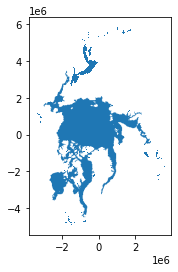

In [21]:
new1.plot()

In [22]:


result = pd.concat([old, new1], ignore_index=True, sort=False)

result

,objectid,name,analysisdate,month,year,SHAPE_Length,SHAPE_Area,geometry,FID
0,1.0,197811,1978-11-01T00:00:00,11,1978,2665.940717,5860.240913,"MULTIPOLYGON (((143.393 49.073, 143.216 48.270...",NaN
1,2.0,197812,1978-12-01T00:00:00,12,1978,3033.019146,6265.555672,"MULTIPOLYGON (((141.613 44.384, 141.551 43.992...",NaN
2,3.0,197901,1979-01-01T00:00:00,1,1979,3178.760589,6509.636565,"MULTIPOLYGON (((119.055 38.246, 119.120 38.065...",NaN
3,4.0,197902,1979-02-01T00:00:00,2,1979,3235.443751,6636.114144,"MULTIPOLYGON (((121.608 38.771, 121.663 38.587...",NaN
4,5.0,197903,1979-03-01T00:00:00,3,1979,3234.851666,6644.073562,"MULTIPOLYGON (((118.301 38.268, 118.369 38.088...",NaN
...,...,...,...,...,...,...,...,...,...
435,436.0,201504,2015-04-01T00:00:00,4,2015,3028.573689,6130.483827,"MULTIPOLYGON (((125.259 38.969, 125.300 38.783...",NaN
436,437.0,201505,2015-05-01T00:00:00,5,2015,2812.741868,5920.578131,"MULTIPOLYGON (((144.372 44.305, 144.328 44.110...",NaN
437,438.0,201506,2015-06-01T00:00:00,6,2015,2734.209098,5529.887519,"MULTIPOLYGON (((143.545 47.014, 143.502 46.816...",NaN
438,439.0,201507,2015-07-01T00:00:00,7,2015,2417.127344,4970.616419,"MULTIPOLYGON (((143.645 51.537, 143.596 51.333...",NaN


In [23]:
result.plot()

ValueError: 'box_aspect' and 'fig_aspect' must be positive

ValueError: 'box_aspect' and 'fig_aspect' must be positive

<Figure size 432x288 with 1 Axes>

In [7]:
# export to geojsson

new1.to_file("new1.geojson", driver='GeoJSON')

In [8]:
new1new = gpd.read_file("new1.geojson")
new1new

,FID,SHAPE_Area,geometry
0,0,5.625000e+09,"POLYGON ((1000000.000 5850000.000, 1050000.000..."
1,1,6.250000e+08,"POLYGON ((1650000.000 5800000.000, 1675000.000..."
2,2,1.875000e+09,"POLYGON ((700000.000 5775000.000, 750000.000 5..."
3,3,6.250000e+08,"POLYGON ((1325000.000 5775000.000, 1350000.000..."
4,4,1.250000e+09,"POLYGON ((1050000.000 5750000.000, 1075000.000..."
...,...,...,...
129,129,6.250000e+08,"POLYGON ((-1425000.000 -4750000.000, -1400000...."
130,130,6.250000e+08,"POLYGON ((-1325000.000 -4775000.000, -1300000...."
131,131,1.250000e+09,"POLYGON ((-1700000.000 -4800000.000, -1650000...."
132,132,6.250000e+08,"POLYGON ((-1425000.000 -4850000.000, -1400000...."
